![title](../images/logo_nao_digital.png)

# Tema 1: Análisis Exploratorio de Datos
## 1. Objetivo

Realizar un análisis exploratorio de datos de la información proporcionada por el equipo de BikerPro para plantear un modelo predictivo de la demanda de renta de bicicletas.

## Datos de BikerPro

Cómo se ha mencionado en el Anexo A, se ha provisto la siguiente información al equipo del `Ministerio de Análisis de Datos`:

| Nombre 	| Descripción 	| Tipo 	|
|---	|---	|---	|
| Date 	| Fecha (con año, mes y dia) 	| Fecha 	|
| Rented Bike Count 	| Cantidad de bicicletas rentadas por fecha y hora  	| Entero 	|
| Hora 	| Hora del día 	| Entero 	|
| Temperature 	| Temperatura promedio en grados centígrados 	| Real 	|
| Humidity  	| Nivel de humedad en el ambiente, en porcentaje. 	| Real 	|
| Wind speed 	| Velocidad del viento, en metros sobre segundo 	| Real 	|
| Visibility 	| Medida del nivel de visibilidad de 10 metros (mayor visibilidad   implica mejores condiciones meteorológicas para ver de lejos a un objeto). 	| Real 	|
| Dew point temperature 	| Temperatura de punto de rocío, es decir temperatura más alta en que   el agua se condensa, medida en grados centígrados 	| Número Real 	|
| Solar radiation  	| Es una medida de la radiación solar promedio existente en el   ambiente, medida Megajoules / metros cuadrados 	| Número Real 	|
| Rainfall 	| Se refiere a la cantidad de precipitación pluvial que hay a nivel   de suelo, medida en milímetros 	| Número Real 	|
| Snowfall 	| Nivel de caída de nivel (en centímetros) 	| Numérico 	|
| Seasons 	| Estación del año en inglés (Winter, Spring, Summer, Autumn) 	| Texto 	|
| Holiday 	| Indica si esa fecha y hora es festiva 	| Texto 	|
| Functional Day 	| Describe si en esa hora específica el servicio de renta se   encontraba en funcionamiento (se podía rentar un equipo) o no 	| Texto    	|




Este documento se desarrollarán scripts en Python que permitan procesar la  la información de Biker para realizar posteriormente el análisis de sus datos.

## 2. Librerias de trabajo

In [1]:
# Instala libreria Pandas si no la tenemos
pip install pandas seaborn -y

In [64]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos

Primero nos encargaremos de leer los datos, indicando a Python donde se encuentra la carpeta que contiene los datos y los nombres de los archivos relevantes para el análisis.

In [10]:
#  Indicamos la ruta a la carpeta de de tu computadora 
# donde se ubican los datos de BikerPro
# Ejemplo: "C:\Usuarios\[tu nombre]\Descargas"

DATA_PATH=""

Ahora procederemos a definir una variable que indique el nombre del archivo junto con su extensión (por ejemplo, `.csv`):

In [11]:
FILE_BIKERPRO = ''

Echaremos mano de la utilidad `os.path.join` de Python que indicar rutas en tu computadora donde se ubican archivos, así Pandas encontrá los archivos de datos.


**Ejemplo**

A continuación mostraremos un ejemplo leyendo el archivo `SeoulBikeData.csv`:

In [12]:
# Ejemplo
print(f"Ruta del archivo: {FILE_BIKERPRO}")
print(os.path.join(DATA_PATH, FILE_BIKERPRO))

Ruta del archivo: SeoulBikeData.csv
/Users/cesar/sandbox/tecmilenio/DN_PRO_20/data/SeoulBikeData.csv


In [17]:
# Leemos con pandas
bikerpro = pd.read_csv(
    os.path.join(DATA_PATH, FILE_BIKERPRO),
    encoding = "ISO-8859-1"
    )

Podemos explorar el archivo con los comandos `.head(), .tail(), .info(), .describe()`

**Funciones .head() y .tail()**

Este comando nos brinda información de los primeros renglones de la tabla:

In [19]:
bikerpro.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

Como sabemos, la información de la tabla describe la cantidad de bicicleta rentadas (`Rented Bike Count`) por dia y hora, junto con otras variables que el equipo de BikerPro considera que, de manera empírica, ha notado son relevantes para este fenómeno.



En complemento el comando `.tail()` nos permite ver el final de la tabla

In [20]:
bikerpro.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

Por simplicidad, limpiaremos los encabezado eliminando unidades, quitando espacios y transformando las letras a minusculas:

In [33]:
# formato de columnas en crudo
raw_columns = list(bikerpro.columns)
raw_columns

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [43]:
clean_columns = [
    x.lower().\
        replace("(°c)", '').\
        replace("(%)", '').\
        replace(" (m/s)", '').\
        replace(" (10m)", '').\
        replace(" (mj/m2)", '').\
        replace("(mm)", '').\
        replace(" (cm)", '').\
        replace(" ", '_')
    for x in bikerpro.columns
    ]

In [44]:
# Este es el formato limpio de las columnas
clean_columns

['date',
 'rented_bike_count',
 'hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'functioning_day']

La siguiente tabla nos muestra la transformación realizada a los nombres de las columnas:

In [45]:
pd.DataFrame({'raw_column': raw_columns, 'clean_column': clean_columns})

raw_column           clean_column
0                        Date                   date
1           Rented Bike Count      rented_bike_count
2                        Hour                   hour
3             Temperature(°C)            temperature
4                 Humidity(%)               humidity
5            Wind speed (m/s)             wind_speed
6            Visibility (10m)             visibility
7   Dew point temperature(°C)  dew_point_temperature
8     Solar Radiation (MJ/m2)        solar_radiation
9                Rainfall(mm)               rainfall
10              Snowfall (cm)               snowfall
11                    Seasons                seasons
12                    Holiday                holiday
13            Functioning Day        functioning_day

In [46]:
# Ahora asignamos los nuevmos nombres de columnas para el análisis
bikerpro.columns = clean_columns

**Funciones .info() y .describe()**


Podemos obtener información general de las columnas de la tabla, su formato y la presencia de datos nulos con el comando `.info()`

In [48]:
bikerpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

**Preguntas**

    * ¿Cuántas columnas tiene la tabla?
    * ¿Qué variables se relacionan con el tiempo?
    * ¿Es correcto que el formato de `date` sea del tipo `object`? Sino, ¿qué se debe hacer para corregirlo?
    * ¿Qué columnas se relacionan con variables del clima?
    * ¿Cuáles son indicadores de algún evento especial es un época del año?
    * ¿Cuáles variables son numéricas y cuáles categóricas y porqué?


Como se observa en la parte de arrriba, la columna `date` no fue leída apropiadamente con un formato de fecha, sino como un `object`. En nuestro análisis es importante que dicha variable tenga un formato temporal pues se desea consolidar un modelo predictivo hacia el futuro.

Esto se puede lograr con la función `.to_datetime()` de pandas:

In [50]:
bikerpro['date'] = pd.to_datetime(bikerpro['date'], format='%d/%m/%Y')

Podemos volver a revisar la información del dataframe, para cercionarnos de que se ha realizado el cambio correctamente (el formato debería haber cambiado a `datetime64[ns]`):

In [51]:
bikerpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bike_count      8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

Altenativamente, la función `.describe()` nos permite obtener un resumen estadístico de la variables anteriores, considerando el conteo, el valor promedio, su desviación estandar, los percentiles Q1, Q2 y Q3 (es decir, donde se encuentra el 25%, 50% y 75% de los datos):

In [54]:
bikerpro.describe()

rented_bike_count         hour  temperature     humidity   wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        visibility  dew_point_temperature  solar_radiation     rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

In [55]:
# Para mayor comodidad podemos transponer la matriz anterior:
bikerpro.describe().transpose()

count         mean         std   min     25%      50%  \
rented_bike_count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
solar_radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   

                           75%      max  
rented_bike_count      1065.25  3556.00  
hour                     17.25    23.00  
temperature              22.50    39.40  
humidity                 74.00    98.00  
wind_speed                2.30     7.40  
visibility             2000.00  2000.00  
dew_point_temperature    14.80    27.20  
solar_radiation           0.93     3.52  
rainfall                  0.00    35.00  
snowfall                  0.00     8.80

Este mismo comando se puede aplicar de manera individual a cada columna para conocer un resumen de su información:

In [58]:
# Aplica el comando describe a la columna `date`
bikerpro['date'].describe()

count                    8760
unique                    365
top       2017-12-01 00:00:00
freq                       24
first     2017-12-01 00:00:00
last      2018-11-30 00:00:00
Name: date, dtype: object

**Preguntas**

Observando la tabla anterior:

    * ¿Cuál es la cantidad promedio de bicicletas que se rentan por hora?
    * ¿Cuál es la hora promedio en que se rentan éstos dispositivos?
    * ¿Qué significa que la variable `temperature` tenga un valor mínimo negativo?, ¿qué puede esperarse de las condiciones climátics a esa temperatura y de la renta de bicicletas?
    * ¿Cuál es el rango de fechas mínimo y máximo que abarcan los datos de BikePro?
    * ¿La escala de las variables es la misma o existen algunas en ordenes de magnitud diferentes (e.g. miles vs decimales)?

## 4. Análsis Exploratorio Univariado

Dado quue los datos de BikerPro son de diferentes tipo, es mejor comezar su exploración de cada variable individualmente. Primero comenzaremos con los datos de renta de bicicletas, es decir con la variable `rented_bike_count`.

Dicha variable es de tipo numérico, lo que quiere decir que representa un fenómeno que puede tomar valores en los números reales y de cual puede ser interesante analizar su distribución, si se encuentra alrededor de un valor, si encuentra dispersa o no.

### 4.1 rented_bike_count

Seaborn permite realizar gráficos estadísticos de una forma sencilla, el siguiente ejemplo muestra el histograma de frecuencias de `rented_bike_count` con el comando `hisplot`:

[Text(0.5, 1.0, 'Fig. 1 Histograma de frecuencias de `rented_bike_count`')]

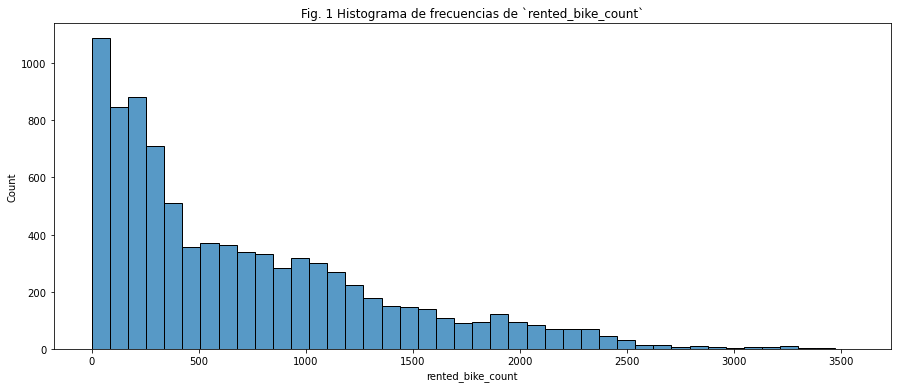

In [65]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.histplot(
    data=bikerpro,
    x= 'rented_bike_count'
    ).set(
        title='Fig. 1 Histograma de frecuencias de `rented_bike_count`'
        )

También podemos elaborar diagramas de caja mediante la utilidad `boxplot`:

[Text(0.5, 1.0, 'Fig. 2 Diagrama de caja de `rented_bike_count`')]

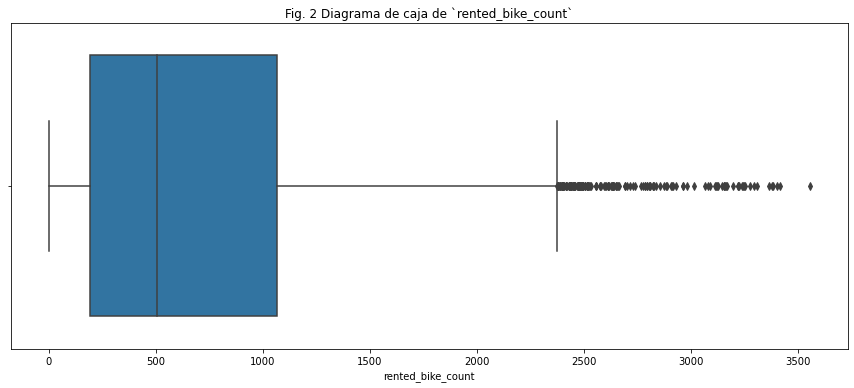

In [66]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))


sns.boxplot(x=bikerpro["rented_bike_count"]).set(
        title='Fig. 2 Diagrama de caja de `rented_bike_count`'
        )

Los diagramas anteriores se observa quue la varible `rented_bike_count`' se encuentra sesgada hacia la izquierda, es decir, la cantidad de bicicletas por hora se trata en su mayoría de cantidades pequeñas, alrededor de las 500 bicicleta por hora. Aunque también se observan episodios donde se rentaron cantidades abruptas de estos dispositivos (más de 2,400 bicicletas).

**Preguntas**

    * ¿Qué puede motivar los valores atípicos en la rentas de bicicletas?
    * ¿Será necesario incoporar estos factores al modelo predictivo?
    * ¿Qué sucedería en el modelo predictivo si no se toman en cuenta tales factores?


Para continuar el análisis, es importante entender que nuestros datos tienen una componente temporal, es decir su valores cambian a lo largo del tiempo, por lo que podemos desentendernos de las variaciones que sufre la evolución del servicio. Como sucede en muchos comercios, al inicio se consolida la adopción del servicio y empieza a crecer la demanda.

Esto se puede analizar usando la función `lineplot`. Para hacer un análisis más sencillo, primero agruparemos los datos suman la demanda por día con la utilidad `.groupby` de pandas:

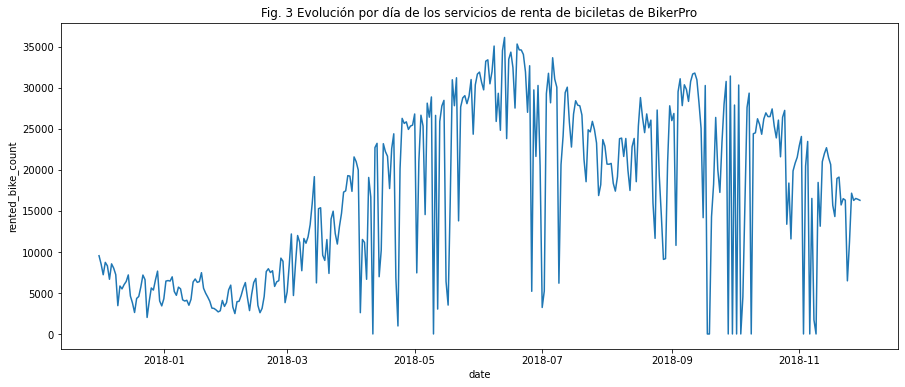

In [72]:
# Calcula los valores de renta de servicios agrupados por dia
temp_data = bikerpro[['date', 'rented_bike_count']].groupby('date').sum().reset_index()

# Convierte el dato a categórico para el plot
temp_data['date'] = temp_data['date'].astype('category')

# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.lineplot(
    x="date",
    y="rented_bike_count",
    data=temp_data
    ).set(
        title='Fig. 3 Evolución por día de los servicios de renta de biciletas de BikerPro'
        )

#plt.xticks(rotation=20)

plt.show()

**Preguntas**

    * ¿A partir de que punto comenzó el incremento en la renta de servicios?
    * En el diagrama se observa que existe valores donde la renta de servicios cae de manera abrupta hasta ser cero. ¿Qué razones pueden explicar dichas caídas? ¿Se puede pensar que de un día para otro las personas dejaron de rentar bicicletas o existe algun otro factor?

### 4.2 Variables relacionadas con el clima

Como sabemos, entre la información proporcionada ser encuentran muchas variables relacionados con las condiciones climáticas, a saber:

* temperature,
* humidity,
* wind_speed,
* visibility,
* dew_point_temperature,
* solar_radiation,
* rainfall,
* snowfall

Primero nos enfocaremos en la variable de temperatura. Como antes veremos su histograma de frecuencias y su diagrama de caja:

[Text(0.5, 1.0, 'Fig. 4 Histograma de frecuencias de `temperature`')]

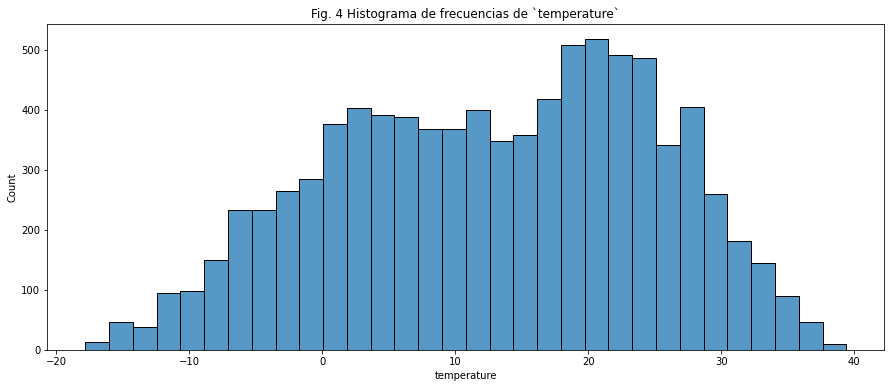

In [75]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.histplot(
    data=bikerpro,
    x= 'temperature'
    ).set(
        title='Fig. 4 Histograma de frecuencias de `temperature`'
        )

[Text(0.5, 1.0, 'Fig. 5 Diagrama de caja de `temperature`')]

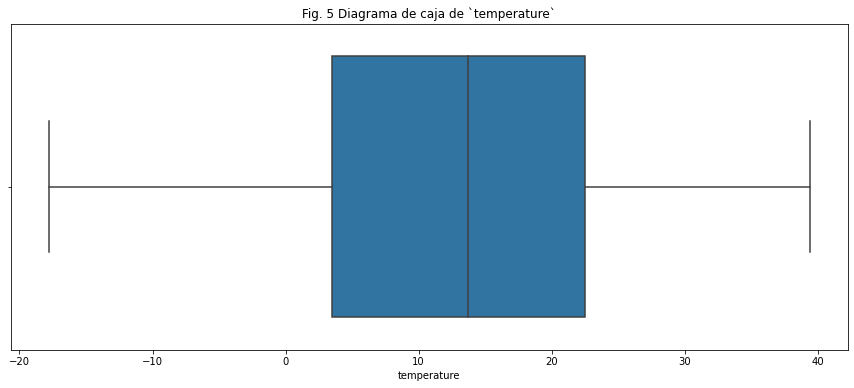

In [81]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.boxplot(x=bikerpro["temperature"]).set(
        title='Fig. 5 Diagrama de caja de `temperature`'
        )

En esta caso, los datos son más simétricos, encontrándose alrededor de los `11.9` grados, pero que alcanza varios grados bajo cero y temperatuas extremas cercanas a los `40` grados. Esto puede deberse a que aunque Seúl tiene un clima templado la temperatura varia a los largo del año según las estaciones del año.

**solar_radiation**

Podemos repertir lo anterior, pero ahora con la variable `solar_radiation`. Primero se debe observar que la variable en su mayoria, aunque oscila entre 0 y 3.5, en general toma valores pequeños (menores a 0.5):

[Text(0.5, 1.0, 'Fig. 6 Histograma de frecuencias de `solar_radiation`')]

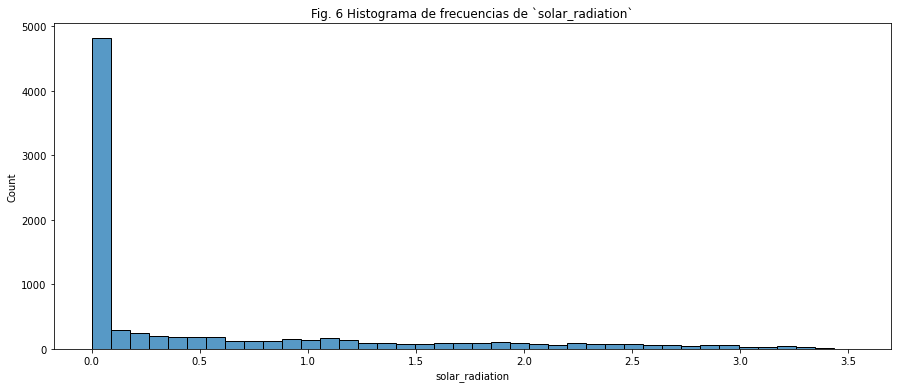

In [91]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.histplot(
    data=bikerpro,
    x= 'solar_radiation'
    ).set(
        title='Fig. 6 Histograma de frecuencias de `solar_radiation`'
        )

[Text(0.5, 1.0, 'Fig. 7 Diagrama de caja de `solar_radiation`')]

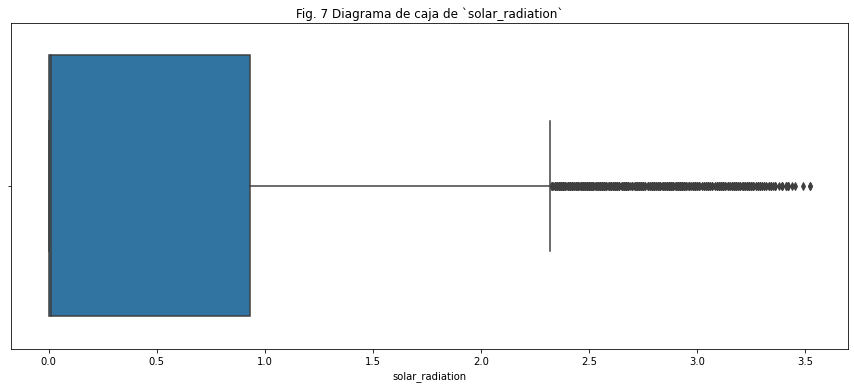

In [83]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.boxplot(x=bikerpro["solar_radiation"]).set(
        title='Fig. 7 Diagrama de caja de `solar_radiation`'
        )

Es decir, generalmente hay dias con niveles de radiación solar bastante pequeña y existen eventos que general mucha radiación solar (probablemente en verano).

**visibility**

Ahora analicemos el caso de la variable `visibility`, la cual nos brinda un parámetro de que tan fácil se puede ver a la distancia, lo cual es relevante para que las personas puedan manejar un vehículo según las condiciones del clima.

Si empleamos la variable describe, notaremos que `visibility` oscila en valores cercanos a 30, pero también superan los miles. Este fenoómeno nos dice que dicha variable se encuentra sesgada:

In [90]:
bikerpro['visibility'].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

El historgrama de frecuencias nos permite observar el sesgo hacia la derecha, es decir, que muchos casos las personas de Seúl tienen dias con buenas condiciones de visibilidad:

[Text(0.5, 1.0, 'Fig. 8 Histograma de frecuencias de `visibility`')]

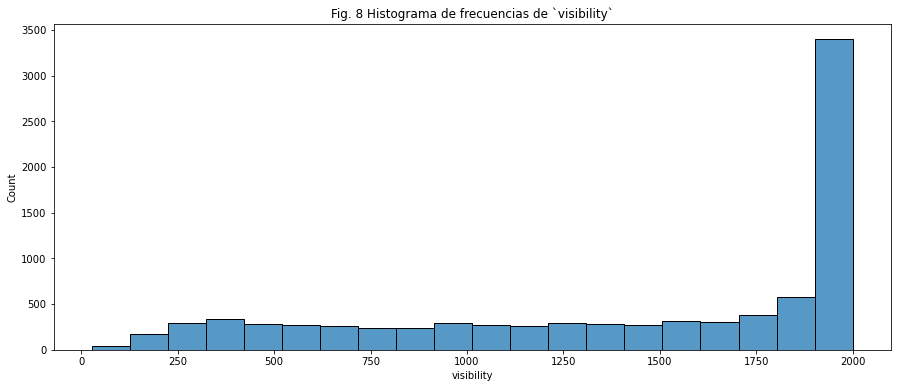

In [92]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.histplot(
    data=bikerpro,
    x= 'visibility'
    ).set(
        title='Fig. 8 Histograma de frecuencias de `visibility`'
        )

Generalmente, cuando una variable tiene una distribución de datos sesgada o con valores en diferentes escalas, se necesita transformar los datos para poder apreciarlos de mejor forma y trabajar con ellos. En este caso, se puede usar la escala logarítmica, como se aprecia continuación con el parámetro `log_scale=True`:

[Text(0.5, 1.0, 'Fig. 9 Histograma de frecuencias de `solar_radiation` en escala logarítmica')]

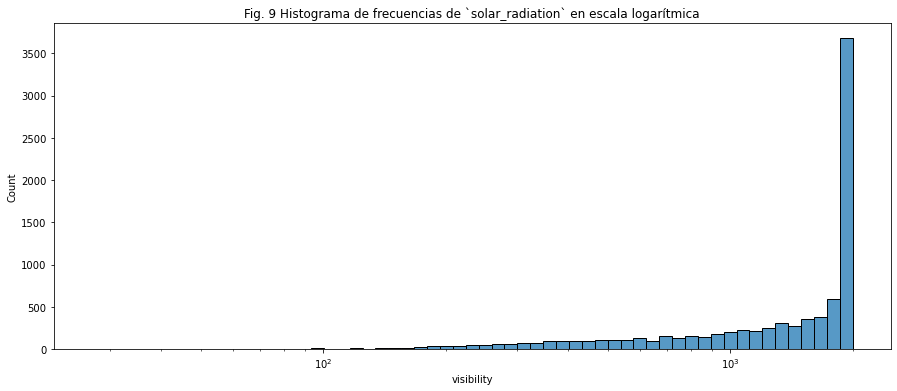

In [96]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.histplot(
    data=bikerpro,
    x= 'visibility',
    log_scale=True
    ).set(
        title='Fig. 9 Histograma de frecuencias de `solar_radiation` en escala logarítmica'
        )

En el histograma anterior se aprecia como conviven datos en diferentes magnitudes, aquellos que no rebasan los cientos y también los que rebasan los miles en la escala de visibilidad.

**Pregunta**

* Ejecute el código 

```
plt.figure(figsize = (20,10))
sns.boxplot(data = bikerpro)
```
* ¿Representará un desafío para predecir la renta de bicicletas que el modelo tenga variables en diferentes escalas?

### 4.3 Variables relacionadas con eventos de temporada

También tenemos algunas variables que nos indican si en temporada del año sucedió algun tipo de evento:

* seasons,
* holiday
* functioning_day

Todas estas variables son de tipo categórico, es decir, representan un campo que puede tomar un número limitado de valores y que representan alguna categoría cualitativa de un individuo o un evento. Por ejemplo, `holiday` no dice si cierta fecha es o no un dia festivo.

En dicha situación, es común analizar su distribución de los conteos de la población a lo largo de sus categorías.

**Seasons**

Si observamos la variable seasons, podemos realizar conteos de los datos para analizar como se distribuyen las categorías por las temporadas:

In [109]:
# Conteos de los registros por las categorías de seasons
bikerpro['seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

Esto mismo se puede calcular como porcentajes añadiendo la bandera `normalize=True`:

In [110]:
bikerpro['seasons'].value_counts(normalize=True)

Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: seasons, dtype: float64

Es decir, vemos que tenemos datos que estan relativamente balanceados entre las temporadas a lo largo del año, cercanos a 25% de los registros por cada estación del año. Esto es muy relevante, pues si solo tuvieramos datos de una temporada, digamos invierno, sería dificil extrapolar el comportamiento de la demanda de servicios en temporadas que ofrecen condiciones climáticas distintas. 

Vale la pena destacar que Seaborn permite visualizar dicho conteos de una manera sencilla usando la función `countplot`:

[Text(0.5, 1.0, 'Fig. 10 Conteo de frecuencias de las categorías de  `seasons`')]

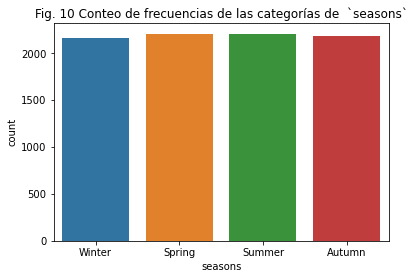

In [119]:
sns.countplot(
    data=bikerpro,
    x="seasons").set(
        title='Fig. 10 Conteo de frecuencias de las categorías de  `seasons`'
        )

**Preguntas**

    * Si hacemos conteos de las categorías de la variable `holiday`, ¿alguna categoría es mayor a otra o no?, ¿que significa la distribución que se obtiene?

## 5. Análsis Exploratorio Bivariado

El análisis bivariado, esencialmente es estudiar la relación estadística de dos variables. Este revela como puede variar una cantidad con referencia a otra y nos permite comprender posibles elementos a considerar para plantear un modelo predictivo.

Comenzaremos con analizar la renta de las bicicletas en función de la hora.

### 5.1 rented_bike_count vs hour

Para revisar la relación entre ambas variables, sumaremos la demanda de renta de bicicletas por hora, con la idea de encontrar tenendencias de horas específicas.

In [117]:
# Suma la cantidad de bicicletas rentadas por hora
temp_bike_hour = bikerpro.groupby(['hour'])['rented_bike_count'].sum().reset_index()

# convierte la hora a categoria para realizar el plot
temp_bike_hour['hour'] = temp_bike_hour['hour'].astype('category')

[Text(0.5, 1.0, 'Fig. 11 Conteo de frecuencias de las categorías de  `seasons`')]

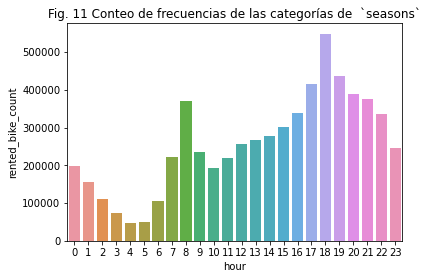

In [120]:
sns.barplot(
    data=temp_bike_hour,
    x="hour",
    y="rented_bike_count").set(
        title='Fig. 11 Conteo de frecuencias de las categorías de  `seasons`'
        )

**Preguntas**

    * ¿Cuales son los horarios con mayor afluencia de renta de servicios de BikePro?
    * En la imagen se visualizan dos picos, uno a las 8 y otro a las 16 horas ¿qué podría explicar estos eventos en el incremento de renta de servicios?
    * ¿Existe algun horario donde la renta de biclicetas tenga una baja sustancial? En caso afirmativo, ¿qué causa puede explicar ese fenómeno?

### 5.2 mean temperature vs date

Otro punto relevante es analizar la hipótesis de que el clima afecta la demanda de servicios de BikerPro. Una forma de ver esto es entender la variación de la temperatura en el periodo de operación de la compañia con una gráfica de su serie de tiempo:

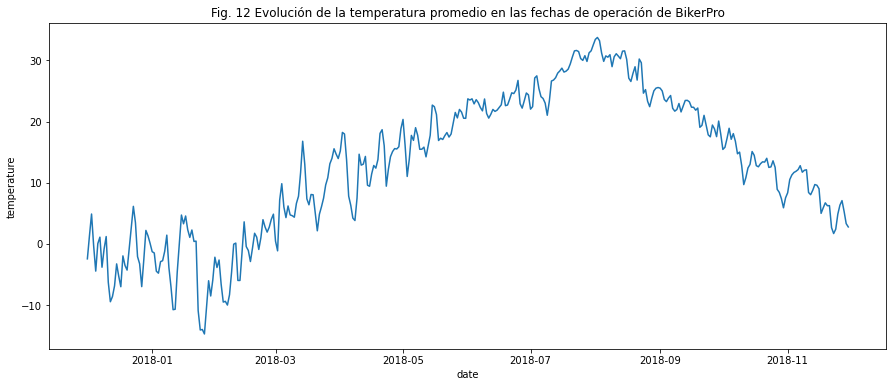

In [122]:
# Calcula los valores de renta de servicios agrupados por dia
temp_data_temperature = bikerpro[['date', 'temperature']].groupby('date').mean().reset_index()

# Convierte el dato a categórico para el plot
temp_data_temperature['date'] = temp_data_temperature['date'].astype('category')

# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.lineplot(
    x="date",
    y="temperature",
    data=temp_data_temperature
    ).set(
        title='Fig. 12 Evolución de la temperatura promedio en las fechas de operación de BikerPro'
        )

#plt.xticks(rotation=20)

plt.show()

**Preguntas**

    * ¿A partir de que punto se observa un incremento en las temperaturas promedio?
    * ¿En que fecha se alcanzó el pico de temperatura observada?
    * ¿Cómo se comparan las observaciones anteriores sobre esta serie de tiempo con la Figura 3 que muestra la evolución de la demanda de servicios?
    * ¿Existe alguna similitud entre el aumento de la temperatura y el aumento de la temperatura?

### 5.3 temperature vs rented_bike_count 

Continuando con el análisis de la relación entre la renta de bicicletas y la temperatura, también se puede visualizar la relación entre ambas variables usando un diagrama de dispersion o `scatterplot`, que esencialmente nos deja entrever si existe una relación directamente o inversamente proporcionalmente entre dos variables numéricas o si por lo contrario no se vislumbra alguna relación lineal específica entre ambas.

Para ello, podemos emplear el método `scatterplot` de seaborn

[Text(0.5, 1.0, 'Fig. 13 Diagrama de dispersion de temperature vs rented_bike_count')]

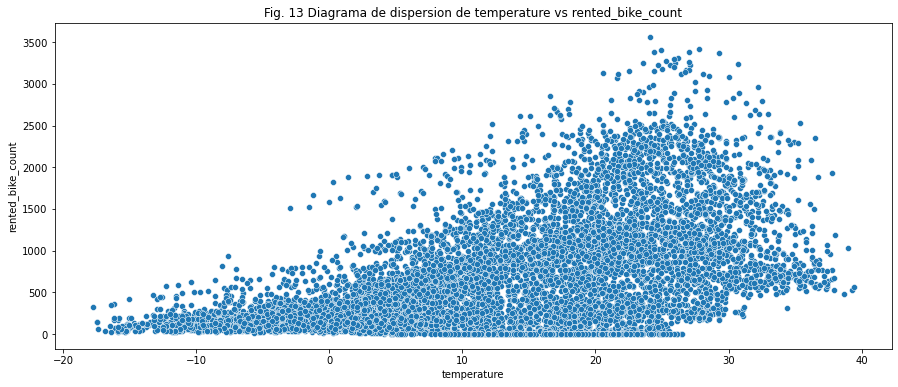

In [129]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.scatterplot(
    data=bikerpro,
    x="temperature",
    y="rented_bike_count",
    ).set(
        title='Fig. 13 Diagrama de dispersion de temperature vs rented_bike_count'
        )

Este diagrama de dispersion nos permite entender que en muchos de los momentos momento donde existió mayoyr renta de bicicletas, la temperatura se superó los 15 grados centígrados y además parece existir una relación directamente proporcional entre ambas.

**Preguntas**

    * ¿Qué sucede con la demanda de bicletas cuando hay temperatuas bajas, aumenta o disminuye?
    * ¿Se debe tomar en cuenta esta variable para desarollar un modelo predictivo de la demanda de BikePro?, ¿qué sucedería con las predicciones de un modelo si no tomaramos en cuenta a la temperatura?

### 5.4 seasons vs rented_bike_count 

Otro punto interesante para analizar es la relación de la bicicletas que se renta de acuerdo a temporada, el típo de gráficos que puede resumir esta relación eficientemente son los diagramas de caja, pues posibilitan comparar distribuciones de de datos numéricos entre grupos. Nuevamente, Seaborn permite construir estos diagramas con el método `boxplot`:

[Text(0.5, 1.0, 'Fig. 14 Diagrama de cajas de `rented_bike_count` a los largo de las categorías de `seasons`')]

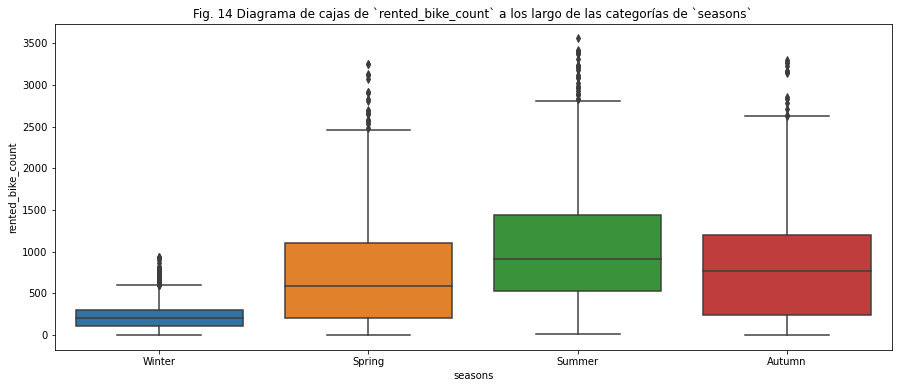

In [135]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.boxplot(
    x=bikerpro["seasons"],
    y=bikerpro["rented_bike_count"]
    ).set(
        title='Fig. 14 Diagrama de cajas de `rented_bike_count` a los largo de las categorías de `seasons`'
        )

**Preguntas**

* ¿Cúal es la estacion con menor demanda de servicios de BikerPro?, ¿qué razones pueden estar detrás de la baja en la renta de bicletas?
* ¿Cúal es la estacion con mayor demanda de servicios de BikerPro?, ¿qué razones pueden estar detrás de la baja en la renta de bicletas?

### 5.4 Diagramas de Pares

Cuando se tienen muchas variables, es de utilidad emplear diagramas de pares o `pair plots` pues permiten visualizar muchas de las relaciones entre variables en una sola figura.

Seaborn permite la construcción de estos diagrama con el comando `pairplot`:

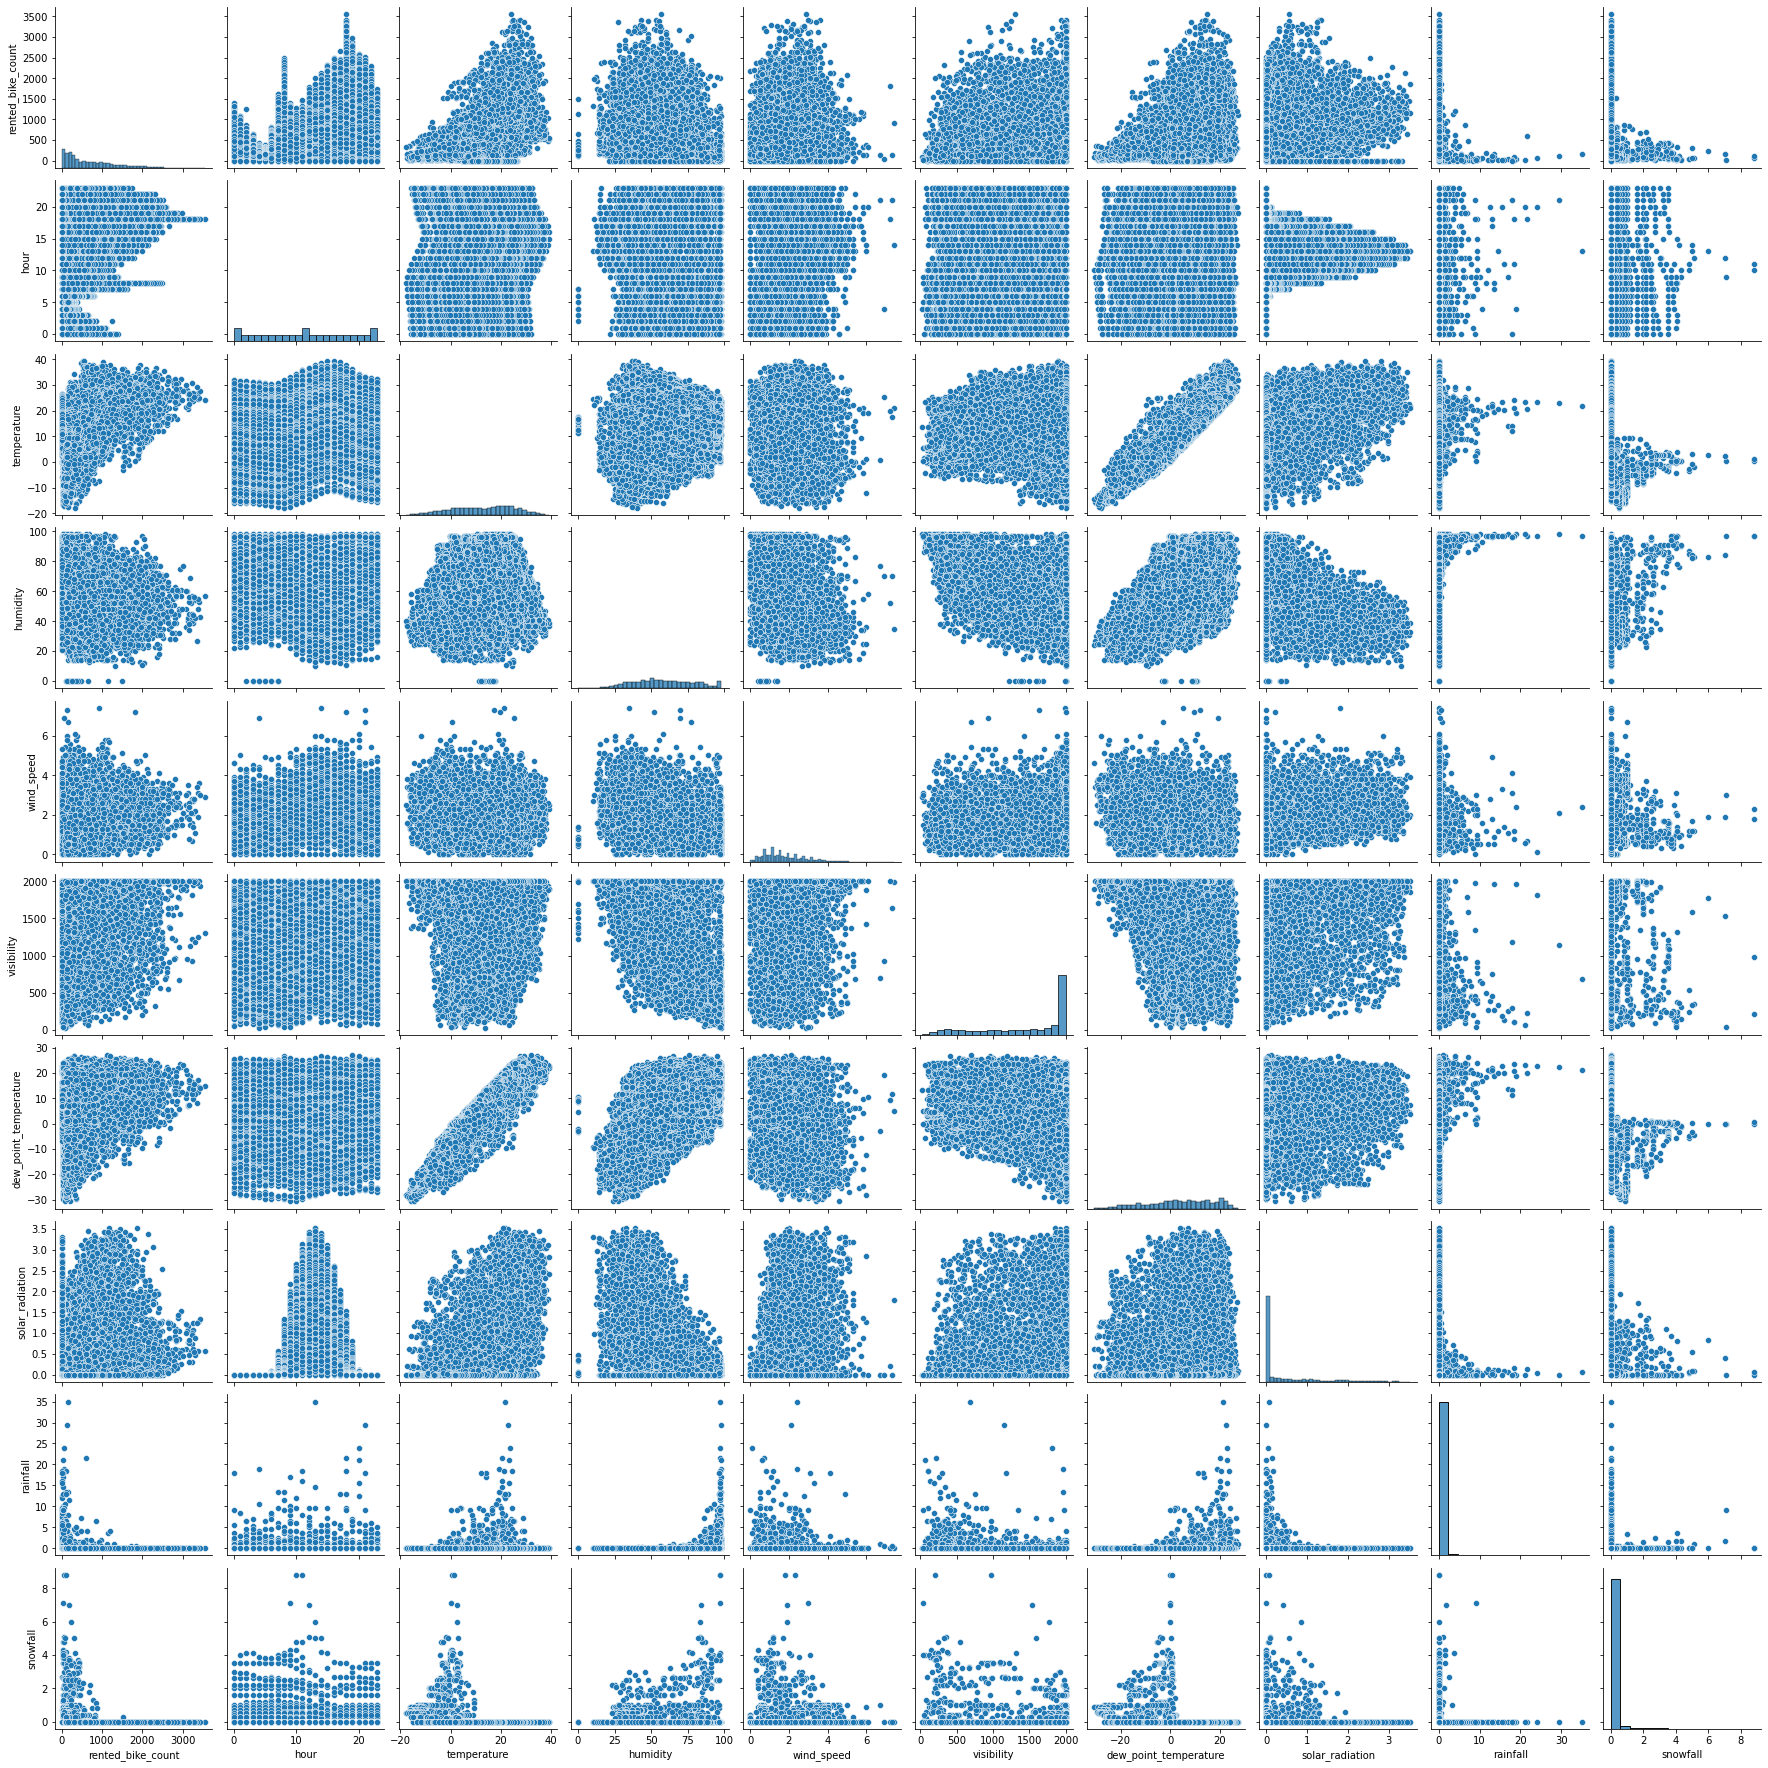

In [138]:
sns.pairplot(
    bikerpro
    )

**Preguntas:**

* ¿Existe alguna relación entre `temperature` y `dew_point_temperature`? De ser así, ¿de qué tipo y que significa para el problema de predicción de demanda de BikerPro?
* Fijemos nuestra atención en la relación entre `hour` y `solar_radiation`. ¿Que forma tiene el diagrama dispersión de ambos?, ¿que explicación tiene la forma que muestran los valores de radicón según la hora?

## 6. Análsis Exploratorio Multivariado

El análisis multivariado aborda la relación estadística entre muchas variables simultaneamente. Normalmente este análisis puede revelar patrones complejos y que son de interés que un modelo predictivo incorpore.

Nuevamente, comenzaremos con analizar la renta de las bicicletas en función de la hora pero esta ves incorporando cortes del análisis según la temporada del año

### 5.1 rented_bike_count vs hour vs season

Para revisar la relación entre rented_bike_count vs hour, se puede emplear la función `lineplot`, la cual al especificar una variable de tipo categórico en su parámetro `hue`, realizará el gráfico de la series de tiempo para los campos de cada categoría agregandolos según el promedio y generando el intervalo de confianza alrededor de la media, que no es más que una región del espacio en que se encontrará la variable en estudio, con ciertno nivel de incertidumbre.

[Text(0.5, 1.0, 'Fig. 16 Diagrama de `rented_bike_count` vs `hour` segmentado por `seasons`')]

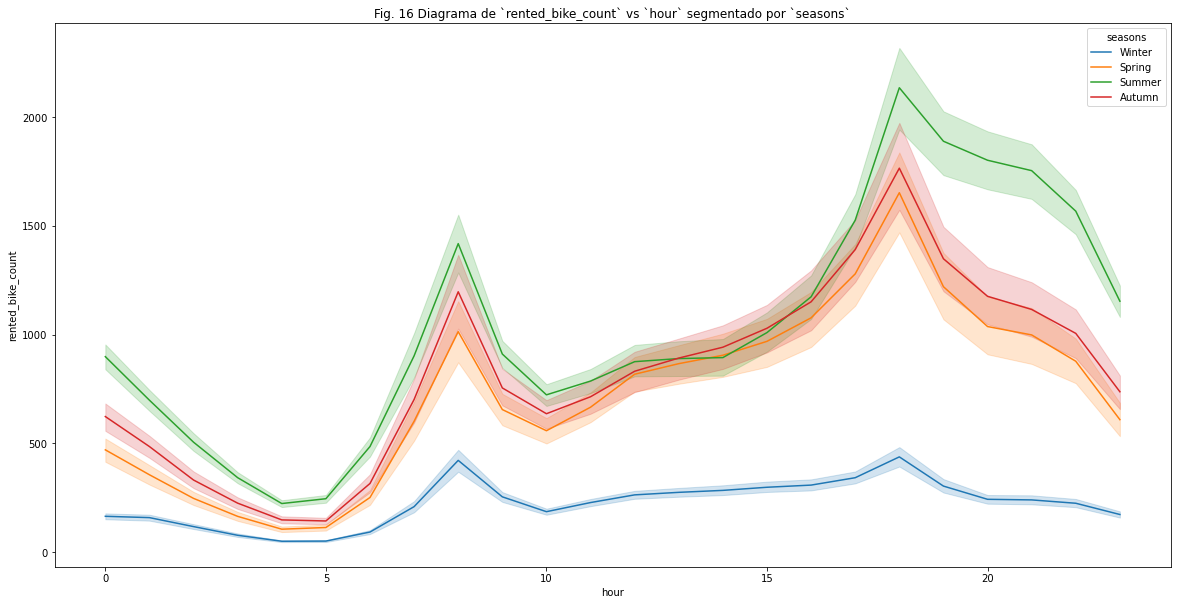

In [160]:
# Especifica el tamaño de la figura
plt.figure(figsize = (20,10))

sns.lineplot(
    data=bikerpro,
    x="hour",
    y="rented_bike_count",
    hue="seasons",
    ).set(
        title='Fig. 16 Diagrama de `rented_bike_count` vs `hour` segmentado por `seasons`'
        )

En este caso, se observa como la serie de tiempo para `summer` tiene valores más altos, mientras que para invierno la renta de bicicletas presenta valores más altos.

**Preguntas**

* ¿Qué tipo de comportamiento esperaria que tuviera el modelo en las predicciones por estación del año?
* Repita el análisis pero ahora cambiando `hue="holiday"`.
  * ¿Existe alguna diferencia en los patrones de renta dependiendo si es o no dia feriado?
  * ¿Los picos en la demanda el el caso de dias feriados son los mismos para días no feriados?

### 5.2 rented_bike_count vs hour vs functioning_day

Ahora exploraremos la relación de las mismas varibles pero considerando el desglose con `functioning_day`. Repitamos el mismo tipo de gráfico:

[Text(0.5, 1.0, 'Fig. 16 Diagrama de `rented_bike_count` vs `hour` segmentado por `functioning_day`')]

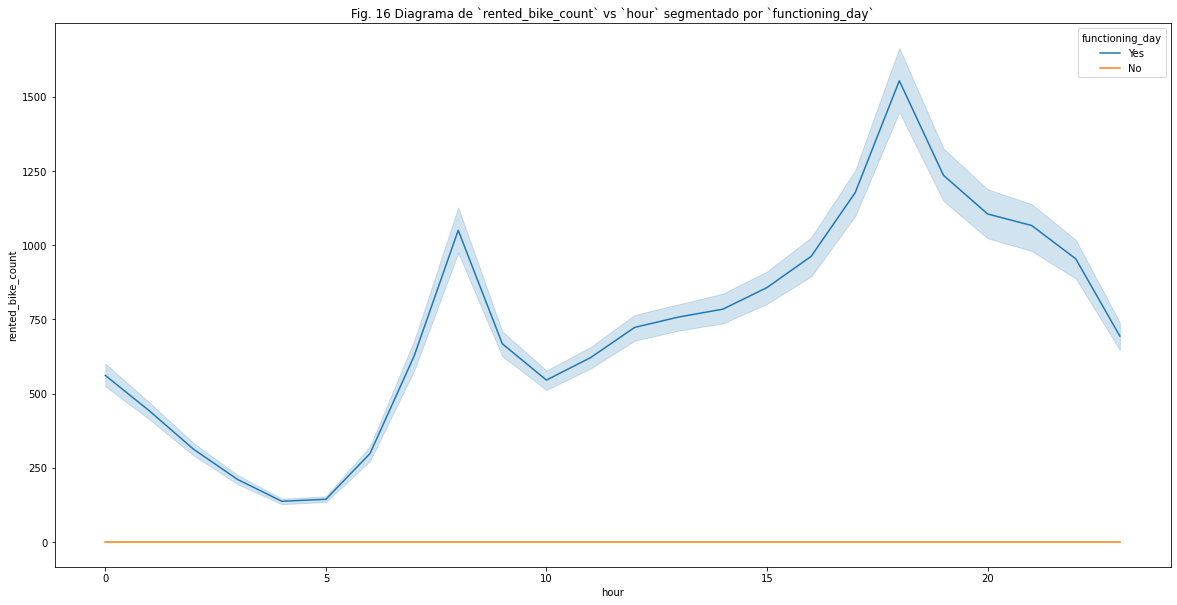

In [161]:
## 5.2 

# Especifica el tamaño de la figura
plt.figure(figsize = (20,10))

sns.lineplot(
    data=bikerpro,
    x="hour",
    y="rented_bike_count",
    hue="functioning_day",
    ).set(
        title='Fig. 16 Diagrama de `rented_bike_count` vs `hour` segmentado por `functioning_day`'
        )

**Preguntas**
* ¿Porqué en la figura anterio el segmento de `functioning_day=No` es una linea en cero?
* Considerando lo anterior, ¿es relevante incluir información de la variable `functioning_day` en el modelo predictivo?, ¿qué sucedería si no se incluyera?

### 5.3 Diagramas para análisis multivariados
Tal como vimos en la parte de análisis bivariado, al cruzar varias varibles se pueden entender relaciones entre dos cantidades. También es posible extender en análisis para incorporar variables categóricas o numéricas para segmentar aun más los gráficos

Seaborn permite la construcción de estos diagrama con el comando `pairplot`, incorporando por ejemplo cambiar colores de varibles categóricas al use el parámetro `hue`:

[Text(0.5, 1.0, 'Fig. 17 Diagrama de dispersion de temperature vs rented_bike_count')]

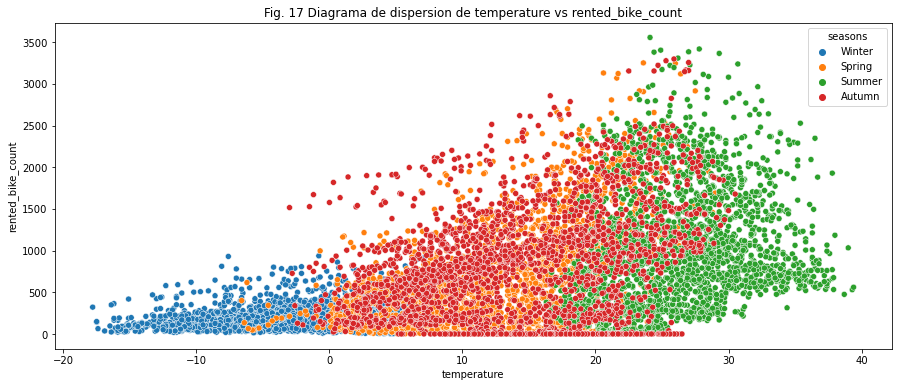

In [179]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

sns.scatterplot(
    data=bikerpro,
    x="temperature",
    y="rented_bike_count",
    hue='seasons',
    ).set(
        title='Fig. 17 Diagrama de dispersion de temperature vs rented_bike_count'
        )

**Relplot**

Un problema con esta clase de visualización es que los puntos empiezan a encimarse unos con otros (`overplotting`), asi que una alternativa al respecto es generar gráficas separadas del mismo fenómeno pero segmentadas por categoria. 

Seaborn permite construir estas visualizaciones de una manera sencilla con `relplot`:

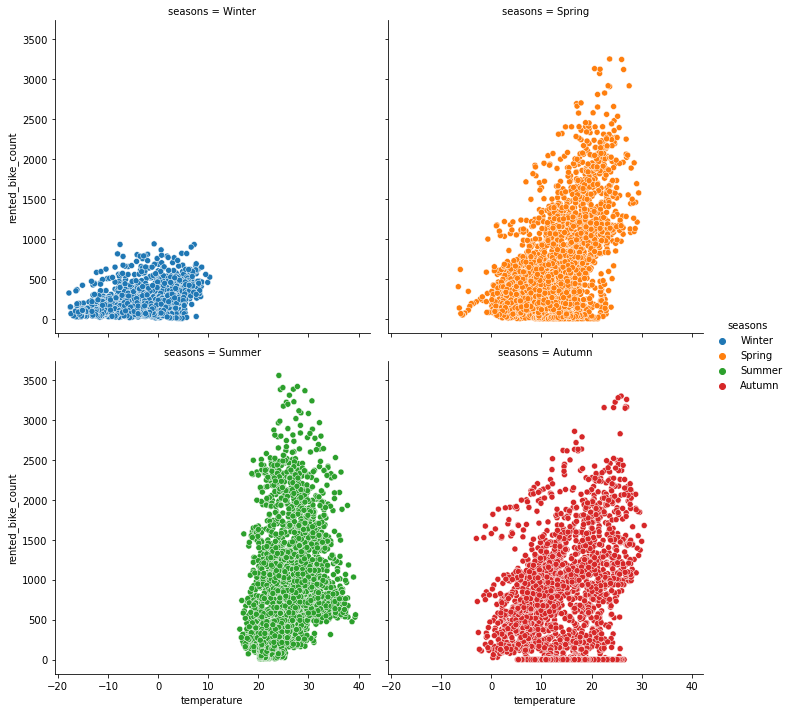

In [199]:
sns.relplot(
    data=bikerpro,
    x="temperature",
    y="rented_bike_count",
    hue="seasons",
    col="seasons",
    col_wrap=2)

En esta figura anterior, se aprecia que hay una relación posiiva entre temperatura y la renta de biclicleta que siempre es positiva, pero que cambia según la época del año.

Adicionalmente, `relplot` puede ampliar aun más los diagramas al aceptar cortes por renglones y columnas, el siguiente es un gráfico
que permite estudiar la relación de temperature y rented_bike_count, aperturado por hora y con señalización por color de la temporada:

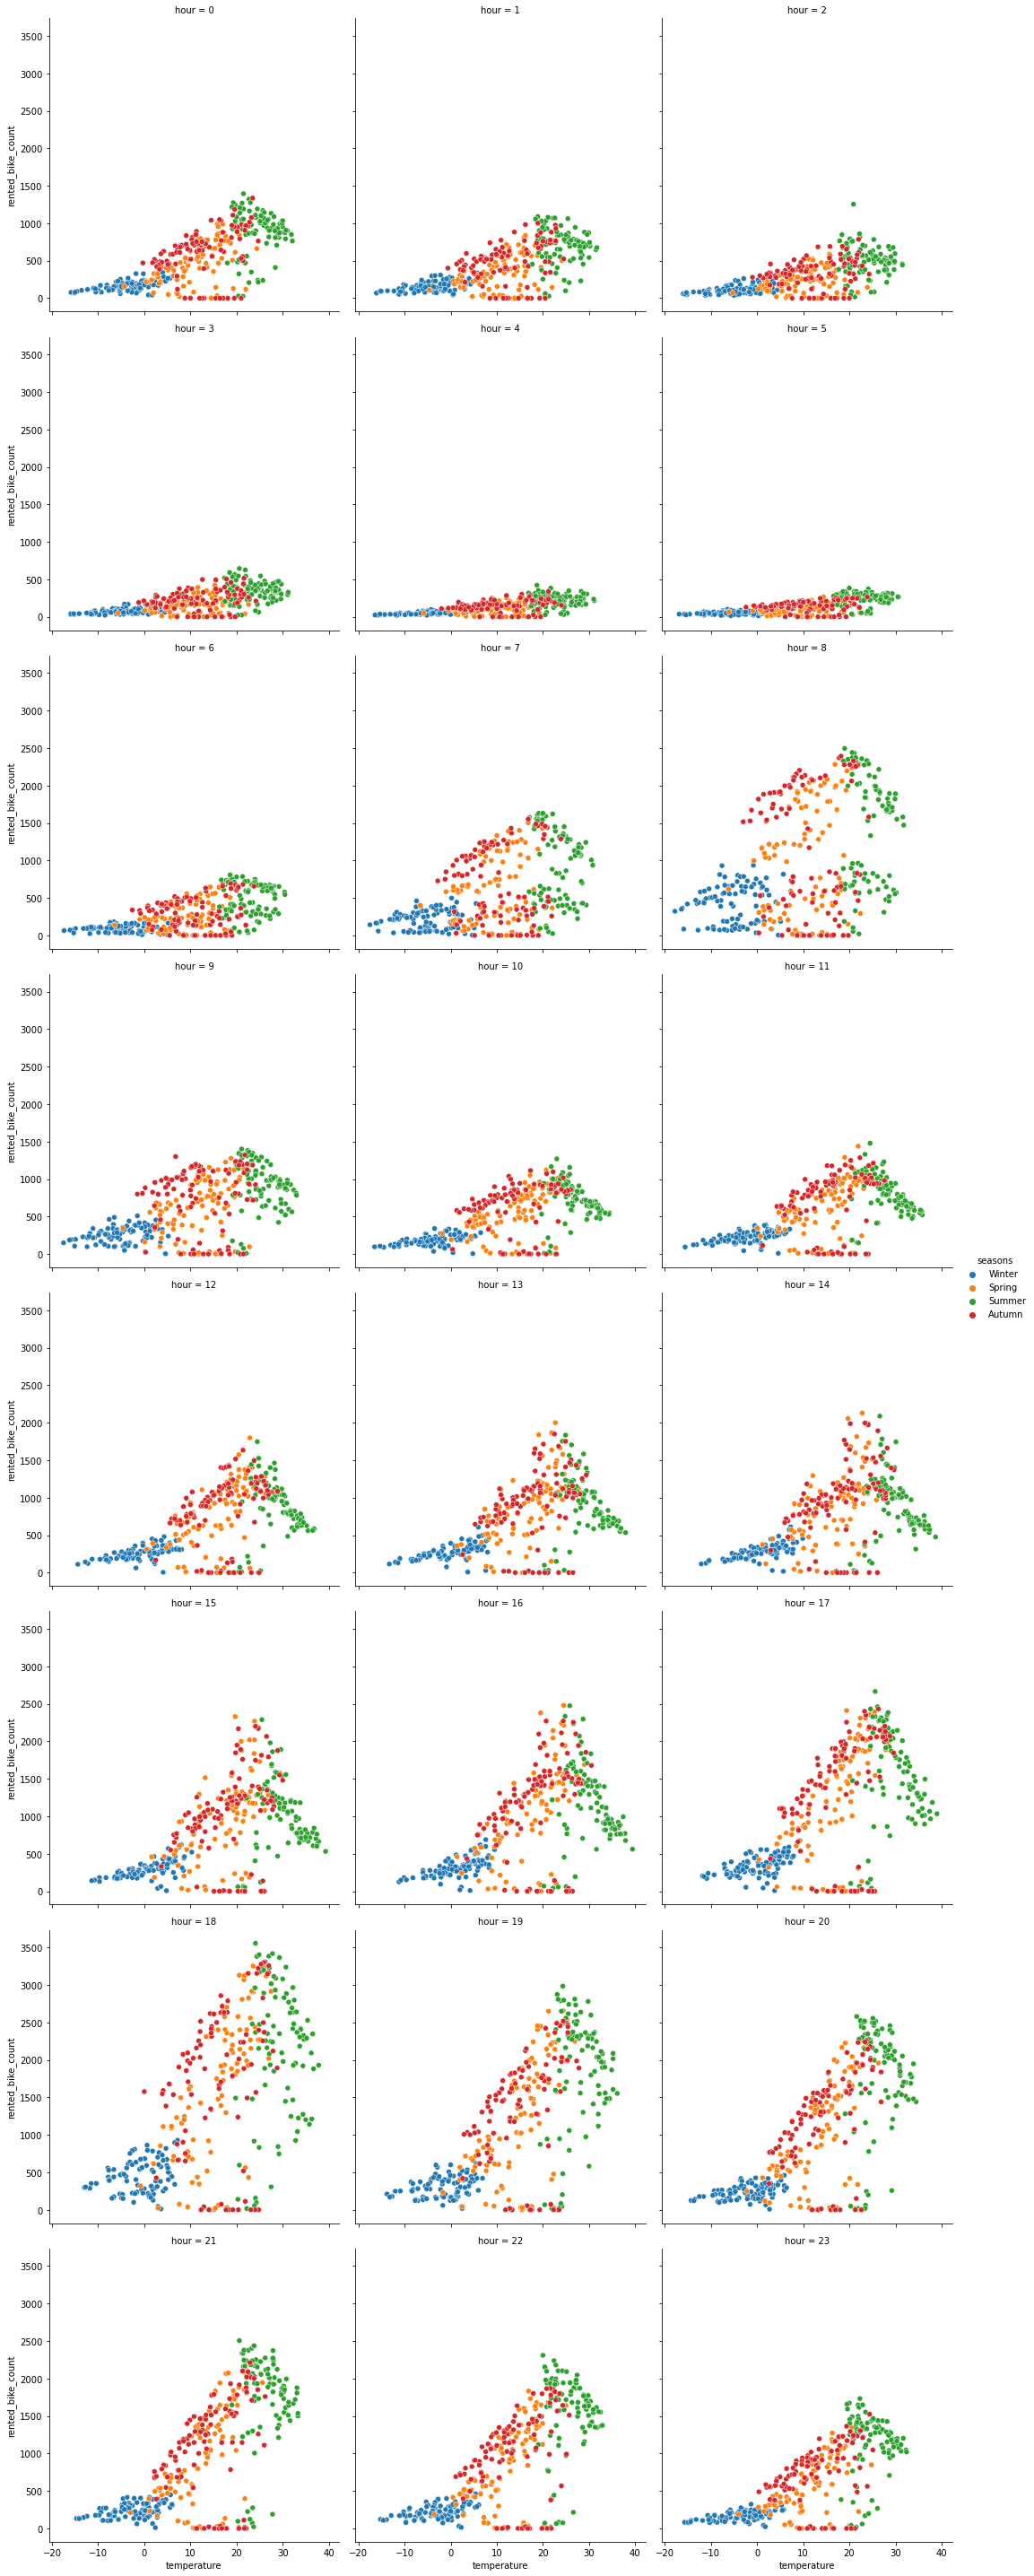

In [195]:
sns.relplot(
    data=bikerpro,
    x="temperature",
    y="rented_bike_count",
    hue="seasons",
    col="hour",
    col_wrap=3)

**Preguntas**

* ¿Existe algun cambio en la tendencia de renta de bicletas y temperatura de acuerdo a la hora en que se segmente el análisis?

**FacetGrid**

Una forma alternativa de generar diagramas multivariados es emplear el método `FacetGrid`. Esencialmente se trata de un wrapper que nos permite realizar muchos plots y alinearnos de forma conveniente para realizar comparaciones segmentadas por variables categóricas.

Abajo se muestra un ejemplo de un diagrama de dispersión de rented_bike_count vs temperature, segmentado por seasons usando la variable `col=seasons`:

<Figure size 1080x432 with 0 Axes>

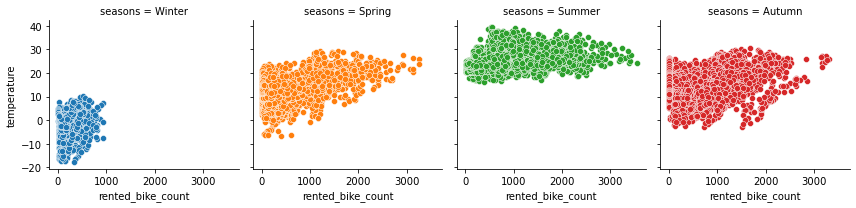

In [198]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

g = sns.FacetGrid(bikerpro, col="seasons",  hue='seasons')
g.map(sns.scatterplot, "rented_bike_count", "temperature",)

Este mismo diagrama se puede ampliar, pero ahora incluyendo `col="seasons", row='holiday'`, lo que nos permite generar muchos diagramas de dispersión de las variables rented_bike_count vs temperature, pero por los grupos de forman las diferentes estaciones del año y dependiendo de si se trata o no de dias festivos:

<Figure size 1080x432 with 0 Axes>

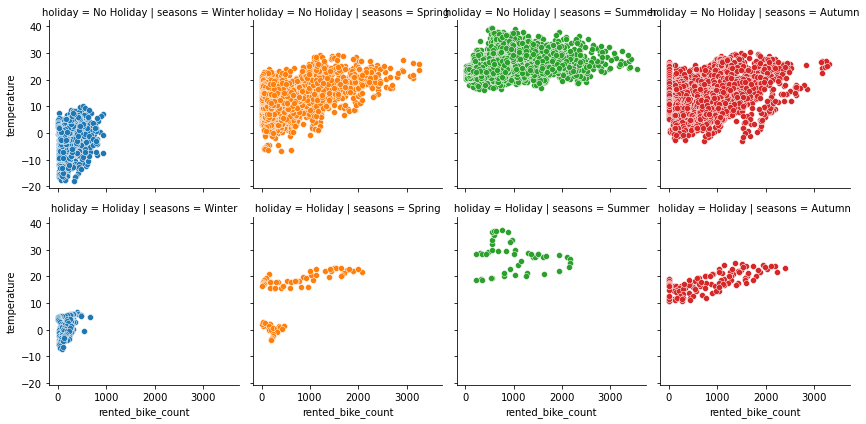

In [184]:
# Especifica el tamaño de la figura
plt.figure(figsize = (15,6))

g = sns.FacetGrid(bikerpro, col="seasons", row='holiday', hue='seasons')
g.map(sns.scatterplot, "rented_bike_count", "temperature",)

### 5.3 Correlación


Una matriz de correlación es una herramienta que se utiliza para analizar la relación lineal entre varias variables. En esencia, lo que hace es medir cuánto se parecen dos variables y cuánto se influyen mutuamente.

En una matriz de correlación, cada variable se representa en una columna y una fila. La diagonal principal de la matriz muestra la correlación de cada variable consigo misma (es decir, su "correlación" perfecta, que es 1). Las celdas fuera de la diagonal muestran la correlación entre dos variables diferentes. La correlación se expresa en un número entre -1 y 1, donde -1 significa que las dos variables están completamente inversamente relacionadas (si una aumenta, la otra disminuye) y 1 significa que las dos variables están completamente relacionadas (si una aumenta, la otra también lo hace).

Seaborn permite graficar la matriz de correlación con la función `.heatmap`

In [207]:
# Calcula la matriz de correlación
correlation = bikerpro.corr()

correlation

rented_bike_count      hour  temperature  humidity  \
rented_bike_count               1.000000  0.410257     0.538558 -0.199780   
hour                            0.410257  1.000000     0.124114 -0.241644   
temperature                     0.538558  0.124114     1.000000  0.159371   
humidity                       -0.199780 -0.241644     0.159371  1.000000   
wind_speed                      0.121108  0.285197    -0.036252 -0.336683   
visibility                      0.199280  0.098753     0.034794 -0.543090   
dew_point_temperature           0.379788  0.003054     0.912798  0.536894   
solar_radiation                 0.261837  0.145131     0.353505 -0.461919   
rainfall                       -0.123074  0.008715     0.050282  0.236397   
snowfall                       -0.141804 -0.021516    -0.218405  0.108183   

                       wind_speed  visibility  dew_point_temperature  \
rented_bike_count        0.121108    0.199280               0.379788   
hour                     0.285197    0.098753               0.003054   
temperature             -0.036252    0.034794               0.912798   
humidity                -0.336683   -0.543090               0.536894   
wind_speed               1.000000    0.171507              -0.176486   
visibility               0.171507    1.000000              -0.176630   
dew_point_temperature   -0.176486   -0.176630               1.000000   
solar_radiation          0.332274    0.149738               0.094381   
rainfall                -0.019674   -0.167629               0.125597   
snowfall                -0.003554   -0.121695              -0.150887   

                       solar_radiation  rainfall  snowfall  
rented_bike_count             0.261837 -0.123074 -0.141804  
hour                          0.145131  0.008715 -0.021516  
temperature                   0.353505  0.050282 -0.218405  
humidity                     -0.461919  0.236397  0.108183  
wind_speed                    0.332274 -0.019674 -0.003554  
visibility                    0.149738 -0.167629 -0.121695  
dew_point_temperature         0.094381  0.125597 -0.150887  
solar_radiation               1.000000 -0.074290 -0.072301  
rainfall                     -0.074290  1.000000  0.008500  
snowfall                     -0.072301  0.008500  1.000000

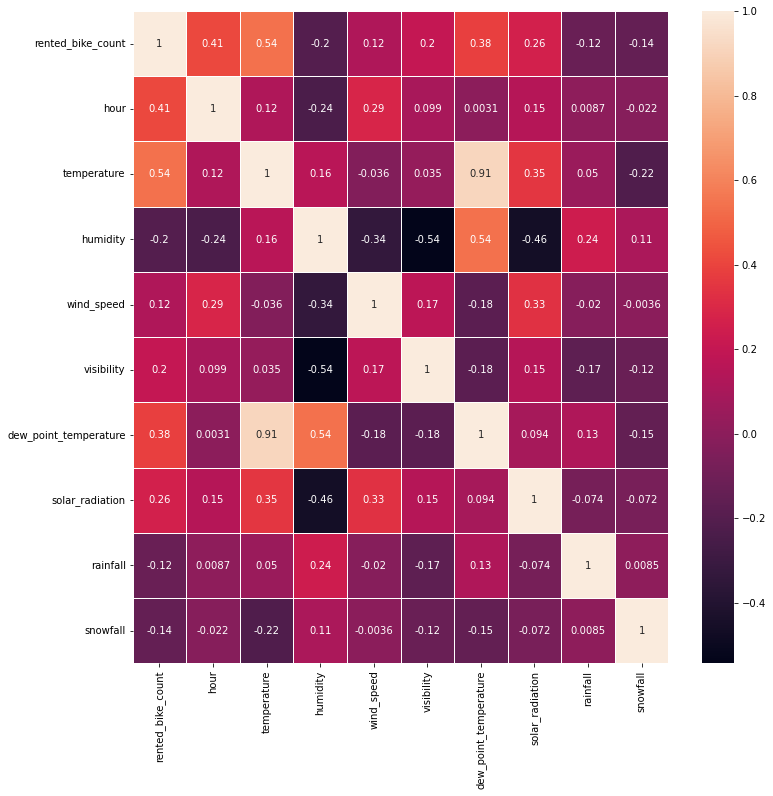

In [203]:
# Define el tamaño de la imagen

fig, ax = plt.subplots(figsize=(12,12))

# Mapa de calor de la matriz de correlación
sns.heatmap(
    correlation,
    annot=True,
    linewidths=.5,
    ax=ax)

plt.show()

**Preguntas**

    * ¿Qué variables presenta una alta correlación positiva (mayor a 0.5) o negativa (menor a -0.5) contra rented_bike_count?
    * ¿`dew_point_temperature` tiene un alto grado de correlación positiva (mayor a 0.5) con cuales variables?, ¿qué significa para este hecho problema?,
    * ¿qué otros pares de variables presentan una alta correlación positiva (mayor a 0.5) o negativa (menor a -0.5)?
    * ¿se deberían de incluir en el modelo variables que tengan una alta correlación entre si? ¿que consecuencias tendría incluirlas?

### 6. Entregables

En esta sección no se esperá un entregable, pero es importante reflexionar sobre la información que el análisis exploratorio nos ha mostrado para el plantear el modelo de predicción de demanda y plantear nuestros propios análisis!